In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import bokeh

In [12]:
df = pd.read_csv(r'C:\Me\Python\Dataset\911CallsData\911CallsData\911.csv',parse_dates=True)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [42]:
df.shape

(326425, 9)

### TOP 5 ZIP CODES BY 911 CALLS

In [79]:
df1 = df.groupby('zip')[['zip']].count()
df1.rename(columns={'zip':'count'},inplace=True)
df1 = df1.reset_index().sort_values(by='count',ascending=False).head(5)
df1['zip'] = df1['zip'].astype(int)
df1

,zip,count
95,19401,22136
116,19464,21588
96,19403,16488
109,19446,15793
99,19406,10800


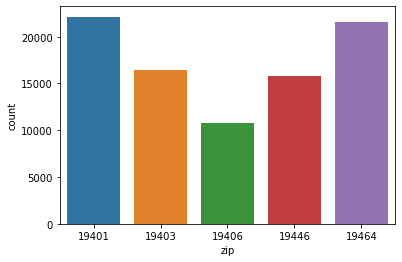

In [91]:
sns.barplot(data=df1,x='zip',y='count')

### TOP 5 TOWNSHIPS FOR 911 CALLS

In [94]:
df2 = df.groupby('twp')[['twp']].count()
df2.rename(columns={'twp':'count'},inplace=True)
df2= df2.reset_index().sort_values(by='count',ascending=False).head(5)
df2

,twp,count
26,LOWER MERION,28073
0,ABINGTON,20206
35,NORRISTOWN,18433
57,UPPER MERION,17276
6,CHELTENHAM,15026


In [119]:
fig = px.bar(data_frame=df2,x='twp',y='count',color='twp')
fig

### UNIQUE TITLES

In [138]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [136]:
df3 = df['title'].str.extract(r'^(.*):')
titles = set(df3[0])
titles

{'EMS', 'Fire', 'Traffic'}

In [141]:
df3

,0
0,EMS
1,EMS
2,Fire
3,EMS
4,EMS
...,...
326420,Traffic
326421,Traffic
326422,Traffic
326423,Traffic
